# Galaxy Classification

This notebook has been adapted from the original from https://github.com/dscpvgcoet/hacktoberfest2020-galaxy-classification-machine-learning/tree/main.

## Galaxy Zoo Data

Galaxy Zoo (https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/) is a crowdsourced astronomy project which invites people to assist in the morphological classification of large numbers of galaxies. For this project, I limited the data to only 3 types of galaxies. The data set is a numpy array containing features and classification of 780 galaxies. This dataset is a sample of galaxies where at least 20 human classifiers (volunteers) have come to a consensus on the galaxy type. Hence, this is a high quality dataset

## Features
The features that I have used to do the galaxy classification are **colour index**, **adaptive moments**, **eccentricities** and **concentrations**. These features are provided as part of the SDSS catalogue.

**Colour** indices are the colour (u-g, g-r, r-i, and i-z) filters from SDSS. Studies of galaxy evolution tell us that spiral galaxies have younger star populations and therefore are 'bluer' (brighter at lower wavelengths). Elliptical galaxies have an older star population and are brighter at higher wavelengths ('redder').

**Eccentricity** approximates the shape of the galaxy by fitting an ellipse to its profile. Eccentricity is the ratio of the two axis (semi-major and semi-minor). The De Vaucouleurs model was used to attain these two axis. To simplify the experiment, I used the median eccentricity across the 5 filters.

**Adaptive moments** also describe the shape of a galaxy. They are used in image analysis to detect similar objects at different sizes and orientations. I used the fourth moment here for each band.

**Concentration** is similar to the luminosity profile of the galaxy, which measures what proportion of a galaxy's total light is emitted within what radius. A simplified way to represent this is to take the ratio of the radii containing 50% and 90% of the Petrosian flux. The Petrosian method allows to compare the radial profiles of galaxies at different distances. If you are interested, you can read more here (http://spiff.rit.edu/classes/phys443/lectures/gal_1/petro/petro.html)  here on the need for Petrosian approach.

For these experiments, we will define concentration as: conc = petro R50/petro R90 , using concentrations from u,r and z bands.

In [1]:
#import import_ipynb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from support_functions import generate_features_targets, plot_confusion_matrix
#from accuracy_check import calculate_accuracy

In [2]:
def calculate_accuracy(predicted, actual):
  return sum(predicted==actual)/len(actual)

In [3]:
def rf_predict_actual(data, n_estimators):
  # generate the features and targets
  features, targets = generate_features_targets(data)

  # instantiate a random forest classifier
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  
  # get predictions using 10-fold cross validation with cross_val_predict
  predicted = cross_val_predict(rfc, features, targets, cv=10)

  # return the predictions and their actual classes
  return predicted, targets

In [4]:
data = np.load('galaxy_catalogue.npy')

In [5]:
print(data.shape)

(780,)


In [7]:
data[0]

(1.85765, 0.67158, 0.4231, 0.3061, 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623, 5.174814, 8.263009, 11.47734, 'merger')

Accuracy score for 25 is  0.8615384615384616
Confusion matrix, without normalization
[[247   1  12]
 [  4 217  39]
 [ 19  33 208]]


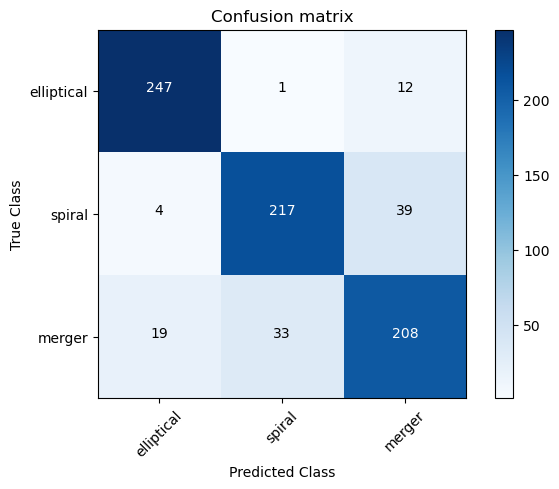

Accuracy score for 50 is  0.8641025641025641
Confusion matrix, without normalization
[[245   1  14]
 [  2 219  39]
 [ 15  35 210]]


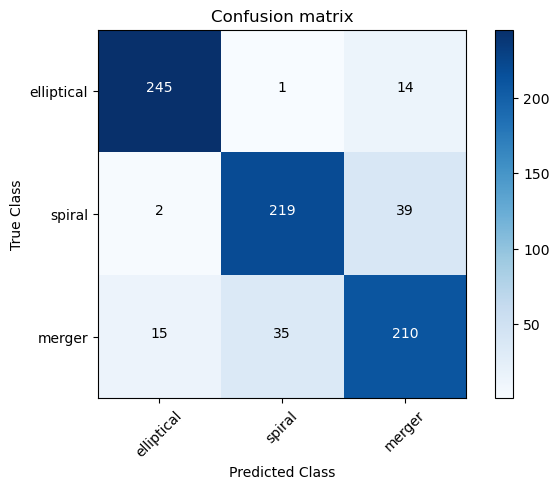

Accuracy score for 75 is  0.867948717948718
Confusion matrix, without normalization
[[245   1  14]
 [  3 217  40]
 [ 12  33 215]]


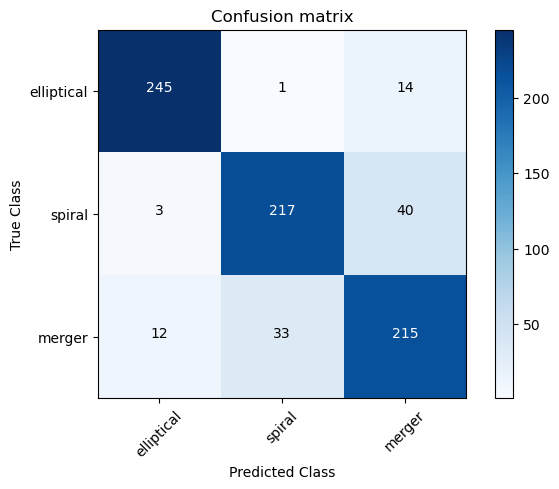

Accuracy score for 100 is  0.8692307692307693
Confusion matrix, without normalization
[[245   1  14]
 [  1 220  39]
 [ 14  33 213]]


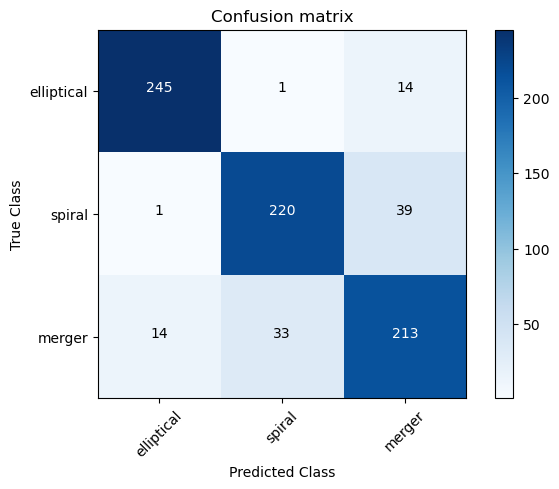

In [13]:
data = np.load('galaxy_catalogue.npy')

# get the predicted and actual classes
number_estimators = [25,50,75,100]            # Number of trees
for num in number_estimators:
    predicted, actual = rf_predict_actual(data, num)

    # calculate the model score using your function
    accuracy = calculate_accuracy(predicted, actual)
    print("Accuracy score for "+ str(num)+' is ' , accuracy)

    # calculate the models confusion matrix using sklearns confusion_matrix function
    class_labels = list(set(actual))
    model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

    # plot the confusion matrix using the provided functions.
    plt.figure()
    plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
    plt.show()

## Additional much more complex project

https://www.kaggle.com/datasets/jaimetrickz/galaxy-zoo-2-images
